<a href="https://colab.research.google.com/github/Suresh-kg/oasis/blob/main/oasis_task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('fradu app.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# prompt: Using dataframe df:  convert categorical data into a numerical format

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Selecting categorical columns to encode
categorical_cols = ['Category', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
# Initializing OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Fitting and transforming the selected columns
encoded_data = encoder.fit_transform(df[categorical_cols])
# Creating a DataFrame with the encoded data and appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
# Concatenating the original DataFrame (excluding original categorical columns) with the encoded DataFrame
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df.head()

,Unnamed: 0,App,Rating,Reviews,Size,Last Updated,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device,Android Ver_nan
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,"January 7, 2018",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Coloring book moana,3.9,967,14.0,"January 15, 2018",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,"August 1, 2018",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Sketch - Draw & Paint,4.5,215644,25.0,"June 8, 2018",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,"June 20, 2018",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Assuming 'Category' is one of the columns in your DataFrame
# If you have already performed one-hot encoding, you might need to reverse it
# or use the original dataframe before encoding for this visualization.
# Let's assume for now you have the original 'Category' column available.

# If 'Category' column is not available in df, you might need to reload the original data or
# find a way to get the original 'Category' column back.

# For demonstration, let's assume we have the original 'Category' column.
# If not, you might need to adjust this code based on your DataFrame structure.
if 'Category' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index[:10])
    plt.title('Top 10 Most Frequent App Categories')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()
else:
    print("The 'Category' column is not found in the DataFrame.")

The 'Category' column is not found in the DataFrame.


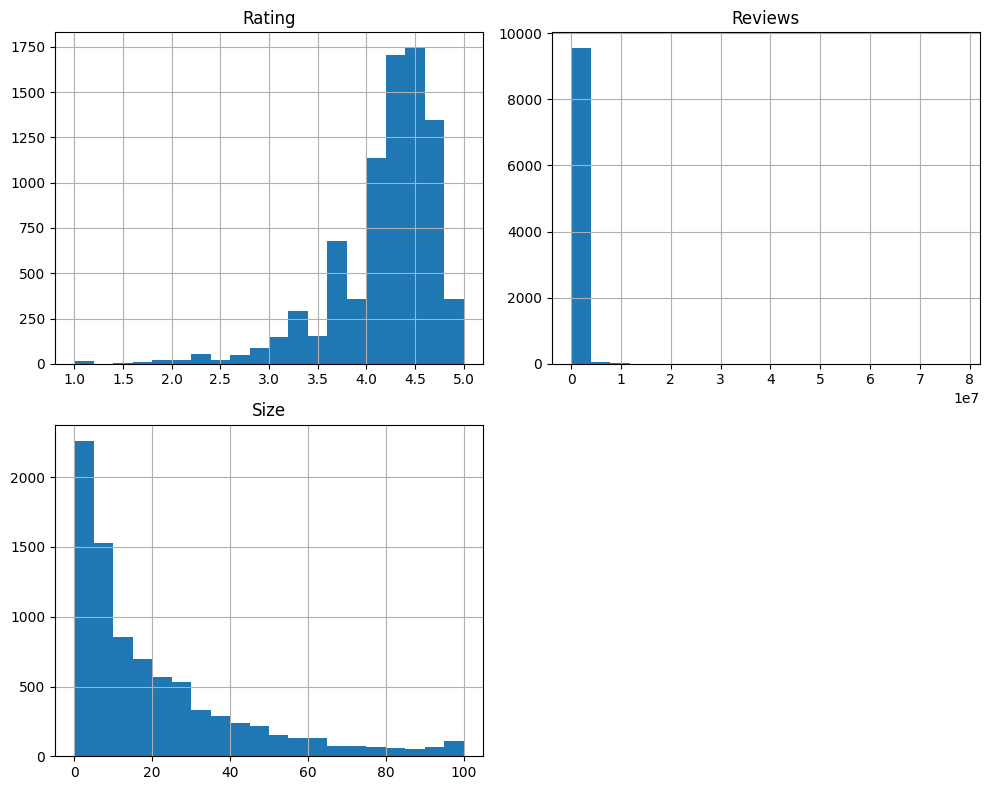

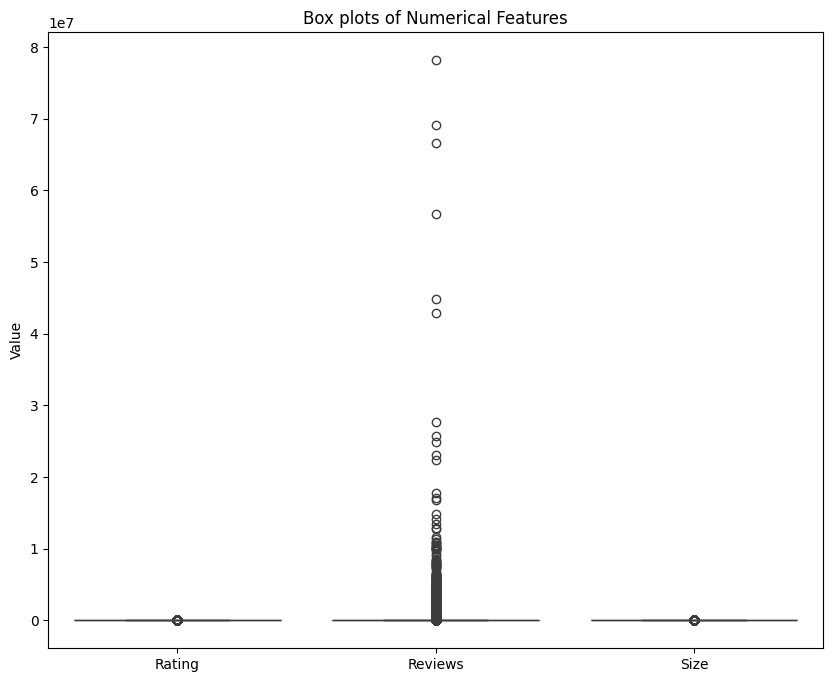

In [ ]:
# Histograms for numerical features
numerical_cols = ['Rating', 'Reviews', 'Size']
df[numerical_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box plots of Numerical Features')
plt.ylabel('Value')
plt.show()

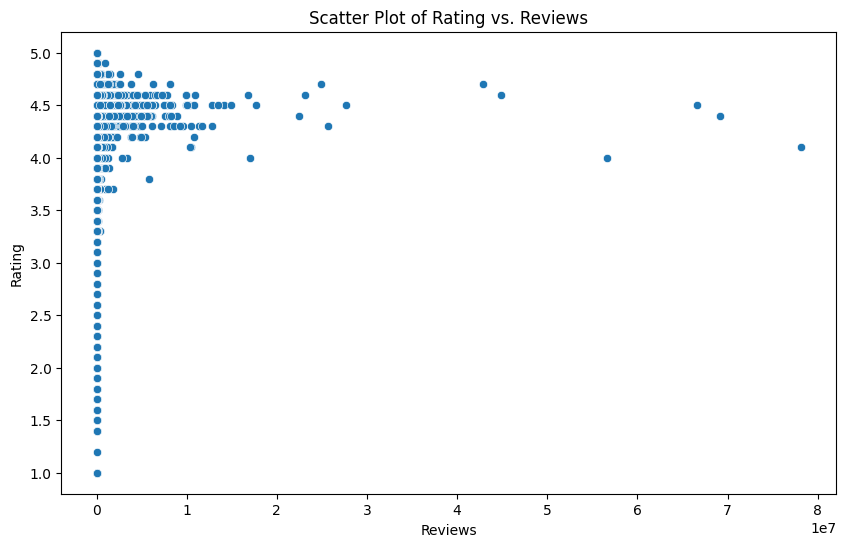

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Scatter Plot of Rating vs. Reviews')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

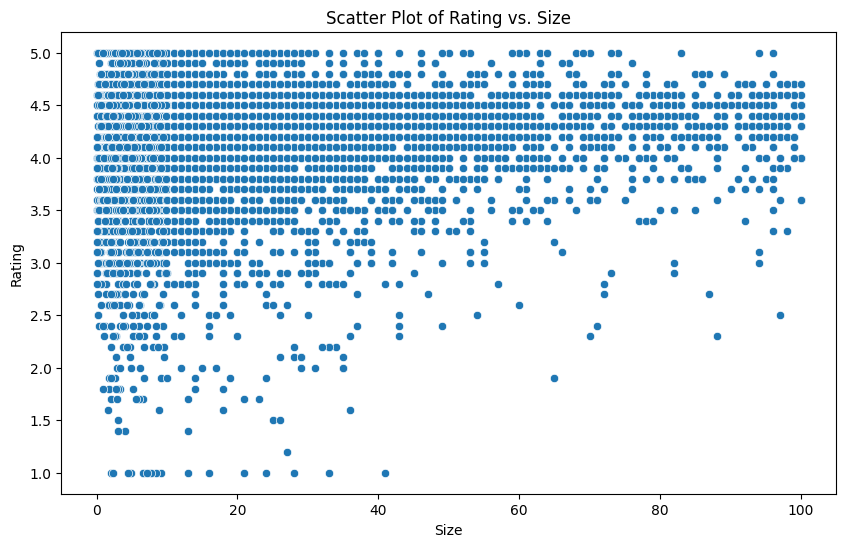

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title('Scatter Plot of Rating vs. Size')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

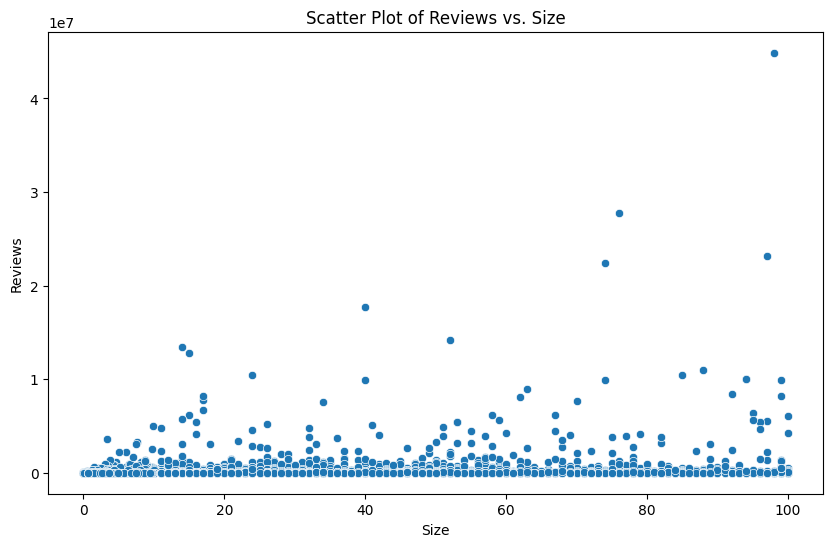

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Reviews', data=df)
plt.title('Scatter Plot of Reviews vs. Size')
plt.xlabel('Size')
plt.ylabel('Reviews')
plt.show()

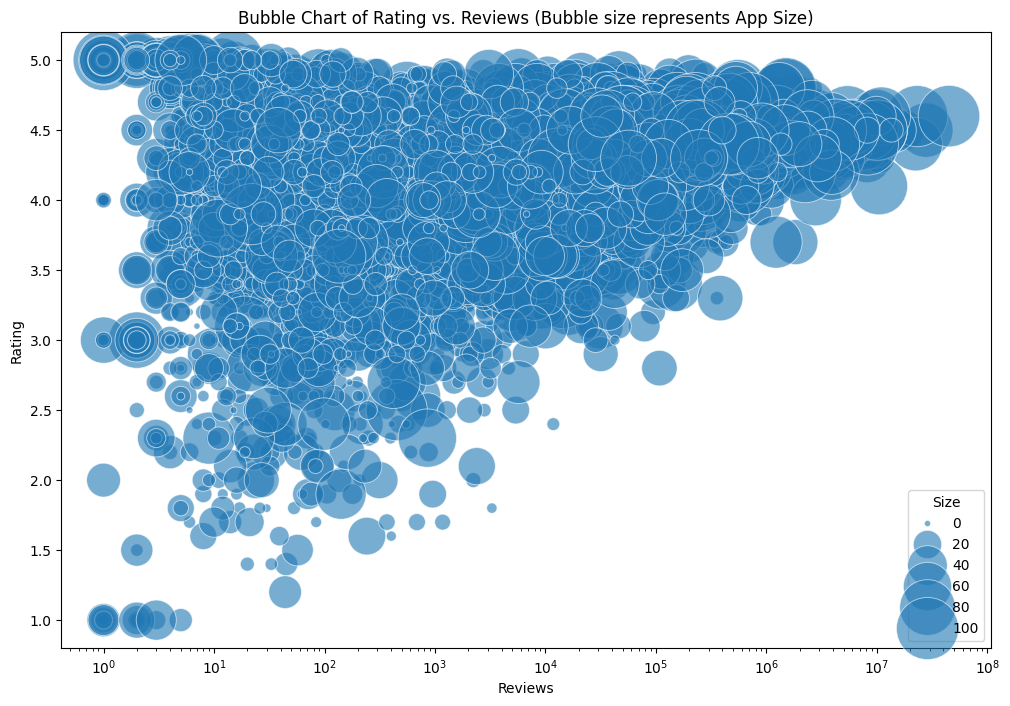

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Reviews', y='Rating', size='Size', data=df, alpha=0.6, sizes=(20, 2000))
plt.title('Bubble Chart of Rating vs. Reviews (Bubble size represents App Size)')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.xscale('log') # Use log scale for Reviews due to wide range
plt.show()